In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batting = pd.read_csv('~/baseball/baseball_csv_files/batting.csv')
#postseason only starts at 1884, so we get rid of any batting from before.
batting = batting[batting.year >= 1884]
#dropping everything that isn't important to batting
batting = batting.drop(labels=['h', 'year', 'player_id', 'stint', 'g', 'team_id', 'league_id', 'sb', 'cs'], axis=1)

postseason_batting = pd.read_csv('~/baseball/baseball_csv_files/batting_postseason.csv')
postseason_batting = postseason_batting.drop(labels=['h', 'year', 'round', 'player_id', 'team_id', 'league_id', 'g', 
                                                     'sb', 'cs'], axis=1)

batting = pd.DataFrame(batting.mean())
#renaming the column so that we can have the indexes appropriatly named
batting = batting.rename(columns={0:'Season'})
#transposing for concatnation
batting = batting.T
#changing all of the data to percentages of types of hit/at bat so it's easier to compare to the post season
batting = batting.astype('float').div(batting['ab'].astype('float'),axis='index')
batting = batting.drop(labels=['ab'], axis=1)
batting = batting.rename(columns={'r':'Runs', 'h':'Hits', '2b': 'Double', '3b': 'Rriple', 'hr': 'Homerun', 
                                  'rbi': 'Runs_batted_in', 'bb': 'Base_on_balls', 'so':'Strikeout', 
                                  'hbp': 'Hit_by_pitch', 'sh': 'Sacrifice_hit', 'sf':'Sacrifice_fly', 
                                  'g_idp': 'Grounded_into_double_play', 'ibb': 'Intentional_walks'})

#here we do the same thing, just too the postseason data
postseason_batting = pd.DataFrame(postseason_batting.mean())
postseason_batting = postseason_batting.rename(columns={0:'Post_Season'})
postseason_batting = postseason_batting.T
postseason_batting = postseason_batting.astype('float').div(postseason_batting['ab'].astype('float'),axis='index')
postseason_batting = postseason_batting.drop(labels=['ab'], axis=1)
postseason_batting = postseason_batting.rename(columns={'r':'Runs', 'h':'Hits', '2b': 'Double', '3b': 'Rriple', 
                                                        'hr': 'Homerun', 'rbi': 'Runs_batted_in', 
                                                        'bb': 'Base_on_balls', 'so':'Strikeout', 
                                                        'hbp': 'Hit_by_pitch', 'sh': 'Sacrifice_hit', 
                                                        'sf':'Sacrifice_fly', 'g_idp': 'Grounded_into_double_play', 
                                                        'ibb': 'Intentional_walks'})

#concatnating the season and postseason for graphing
season_vs_postseason = pd.concat([batting, postseason_batting])
season_vs_postseason = season_vs_postseason.T

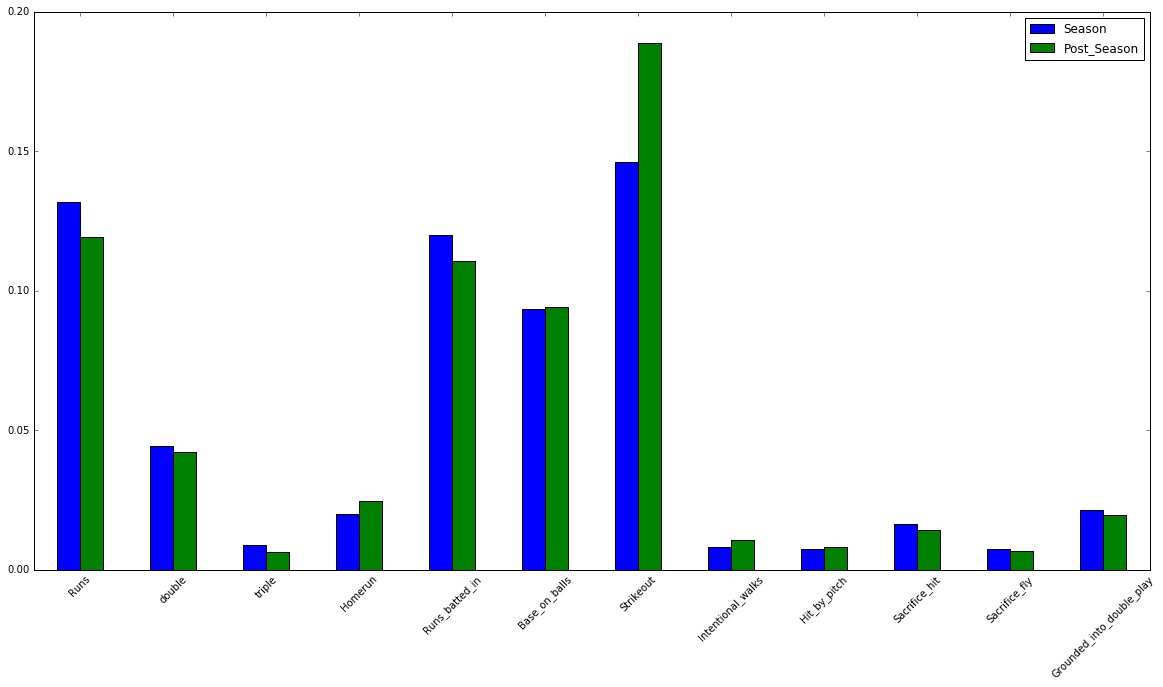

In [3]:
season_vs_postseason.plot(kind='bar', figsize=(20,10), rot=45)

In [4]:
#And here we can see the actual percentages
season_vs_postseason

,Season,Post_Season
Runs,0.132003,0.119236
double,0.044397,0.042438
triple,0.009068,0.006280
Homerun,0.020032,0.024702
Runs_batted_in,0.120114,0.110605
Base_on_balls,0.093495,0.094185
Strikeout,0.146054,0.188989
Intentional_walks,0.008098,0.010917
Hit_by_pitch,0.007432,0.008213
Sacrifice_hit,0.016406,0.014347
